<a href="https://colab.research.google.com/github/ignaciovaldes/estadistica-para-la-investigacion/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

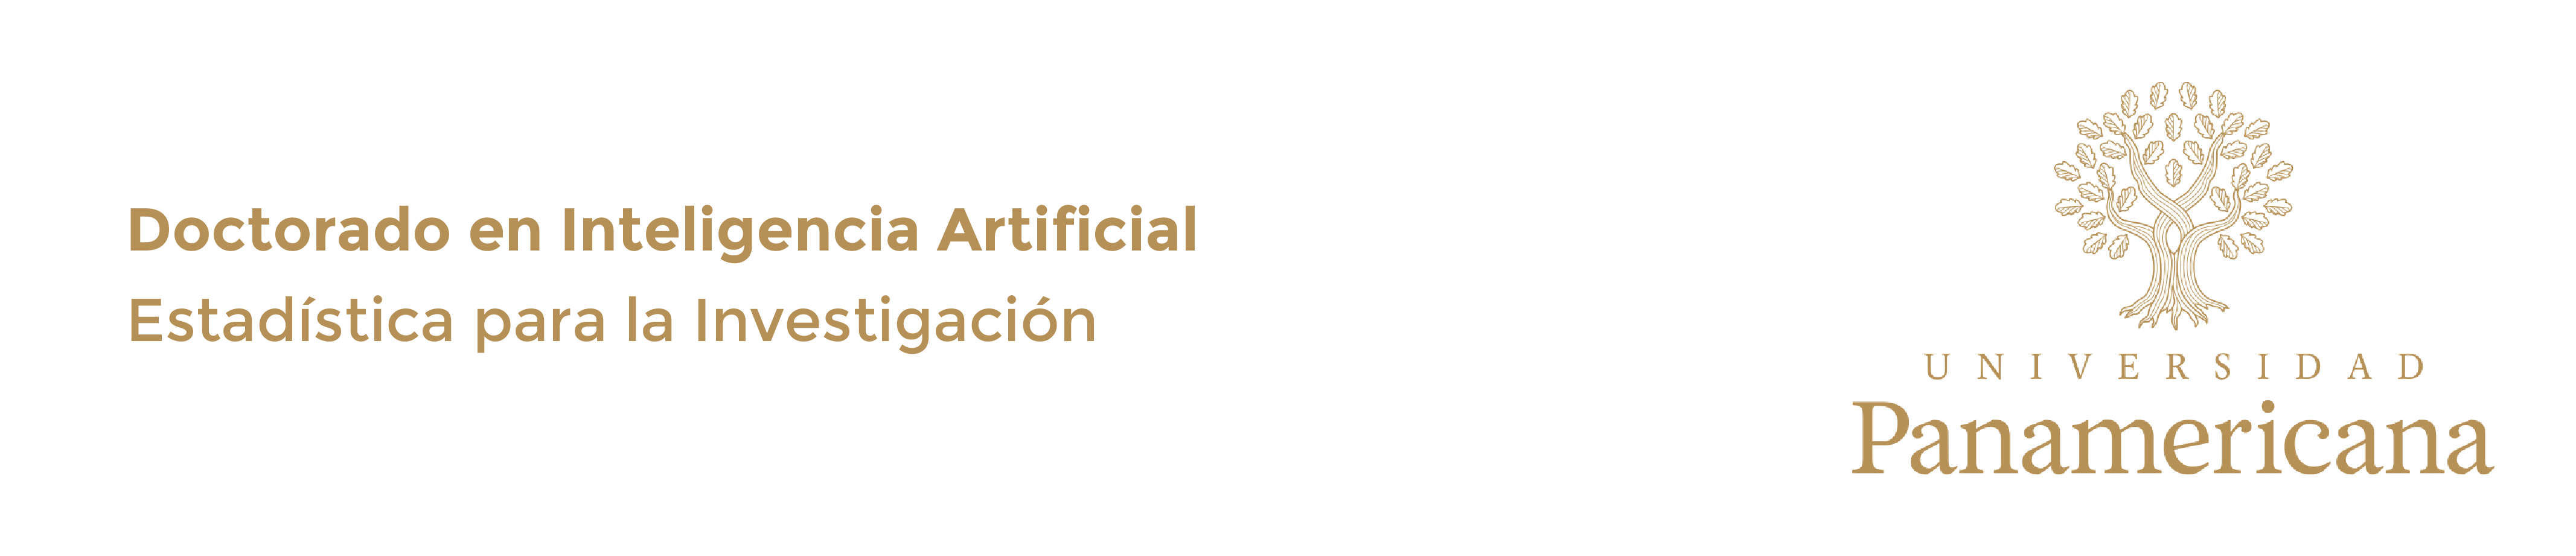
**Profesora:** Dra. Gabriela Macías Esquivel | **Alumno:** Ignacio Valdés Reyes | *Octubre 2024*

# Contexto

En México, hay 35.5 millones de tarjetas de crédito<sup>1</sup> emitidas por diversas instituciones bancarias. A pesar de este acceso al crédito, la morosidad se mantiene en un 3%<sup>2</sup>, subrayando la urgencia de adoptar estrategias digitales más efectivas y menos intrusivas.

# Metodología

Para llevar a cabo este análisis, utilizacé la metodología [CRISP-DM](https://www.ibm.com/docs/es/spss-modeler/saas?topic=dm-crisp-help-overview)<sup>3</sup> (Cross-Industry Standard Process for Data Mining) para estructurar el proceso en fases definidas. La metodología consta de las siguientes etapas:

1.   **Comprensión del negocio:** Se define el problema a resolver y se establecen los objetivos del proyecto. Esta etapa también incluye la identificación de los recursos disponibles, las restricciones del proyecto, y los criterios para evaluar el éxito del análisis.

2.   **Comprensión de los datos:** Se lleva a cabo una exploración inicial de la base de datos para entender su estructura, identificar problemas de calidad de los datos, y determinar su relevancia para los objetivos del proyecto.

3.   **Preparación de los datos:** En esta etapa, se realizan las tareas necesarias para preparar los datos para el análisis, incluyendo la limpieza, transformación y selección de las variables más relevantes.

4.   **Modelado:** Se aplican técnicas estadísticas para identificar patrones y relaciones en los datos que permitan responder a las preguntas planteadas en la fase de comprensión del negocio.

5.   **Evaluación:** Se evalúan los resultados obtenidos para asegurarse de que cumplen con los objetivos del proyecto y son útiles desde la perspectiva del negocio o investigación.

6.   **Despliegue:** Finalmente, se implementan los resultados en el contexto práctico, ya sea mediante la generación de informes o la formulación de recomendaciones para políticas públicas y estrategias de intervención.

# 1. Comprensión del negocio

El proyecto Cobranza Digital de BBVA México busca optimizar la recuperación de deuda mediante notificaciones push, transformando la gestión tradicional de clientes en riesgo de impago o en mora. Este enfoque responde al reto crítico de reducir la cartera vencida en el sector bancario.

**Impacto social:**
Capacidad para estabilizar las finanzas de los clientes, prevenir el sobreendeudamiento y reducir la morosidad. Las notificaciones push permiten una gestión más eficiente y accesible, promoviendo la responsabilidad financiera y evitando el deterioro del historial crediticio.

Además, el enfoque digital mejora la eficiencia operativa al reducir costos asociados a la cobranza tradicional, como visitas domiciliarias y llamadas.

En términos sociales, este proyecto fortalece la estabilidad económica de los hogares mexicanos, mejora la confianza en el sistema financiero y fomenta un entorno económico más saludable.

# 2. Comprensión de los datos

# Objetivo del experimento

Comprender qué factores influyen en la decisión de un cliente de pagar o no después de recibir una notificación push de recordatorio de pago. Es decir, analizar si hay correlaciones entre las características del cliente, y su decisión de pagar después de recibir la notificación push.

# Selección y definición de la variable respuesta

*   payment: Variable binaria que indica si el cliente realizó un pago (1) o no (0).

# Elección de los factores y niveles

*   gender: Género del cliente (F/M).
*   age: Edad del cliente.
*   state: Estado del cliente.

# Determinación del conjunto de unidades experimentales

*   Unidades experimentales: Clientes gestionados de forma digital y su decisión de pagar o no.

# Paso 1: Configuración inicial

In [6]:
# ============================================
# Paso 1: Configuración inicial
# ============================================

# Importar librerías necesarias
import pandas as pd
import numpy as np

# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerías vstadísticas
from scipy import stats
from scipy.stats import shapiro

# Importar librerías para modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score, accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score
)

# Importar librerías para manejo de desequilibrio de clases
!pip install imbalanced-learn --quiet
from imblearn.over_sampling import SMOTE

# Importar librerías para análisis factorial y discriminante
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importar librerías para codificación de variables categóricas
!pip install category_encoders --quiet
import category_encoders as ce

# Configurar opciones de visualización
%matplotlib inline
sns.set(style='whitegrid')

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Paso 2: Cargar el dataset

In [ ]:
# ============================================
# Paso 2: Cargar el dataset
# ============================================

# Montar Google Drive para acceder al archivo
from google.colab import drive
drive.mount('/content/drive')

# Especificar la ruta al archivo
file_path = '/content/drive/My Drive/Universidad Panamericana/Estadística para la investigación/Proyecto final/main_source.csv'

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(file_path)

# Verificar las primeras filas del DataFrame
print("Primeras 5 filas del DataFrame:")
print(df.head())

# Paso 3: Descripción de datos y transformaciones


Primeras 5 filas del DataFrame seleccionado:
  gender   age             state  uu3  payroll_account  payment
0      F  59.0    AGUASCALIENTES    1                1        1
1      M  55.0        NUEVO LEON    1                0        0
2      F  69.0         MICHOACAN    1                0        0
3      M  56.0  CIUDAD DE MEXICO    1                0        1
4      M  57.0  CIUDAD DE MEXICO    1                1        0

Estadísticas descriptivas de 'age':
count    57816.000000
mean        40.077920
std         12.404865
min         19.000000
25%         30.000000
50%         38.000000
75%         48.000000
max         96.000000
Name: age, dtype: float64

Distribución de 'gender':
gender
M    29901
F    27915
Name: count, dtype: int64

Distribución de 'uu3':
uu3
1    56428
0     1388
Name: count, dtype: int64

Distribución de 'payroll_account':
payroll_account
1    30589
0    27227
Name: count, dtype: int64

Distribución de 'payment':
payment
0    36407
1    21409
Name: count, dt

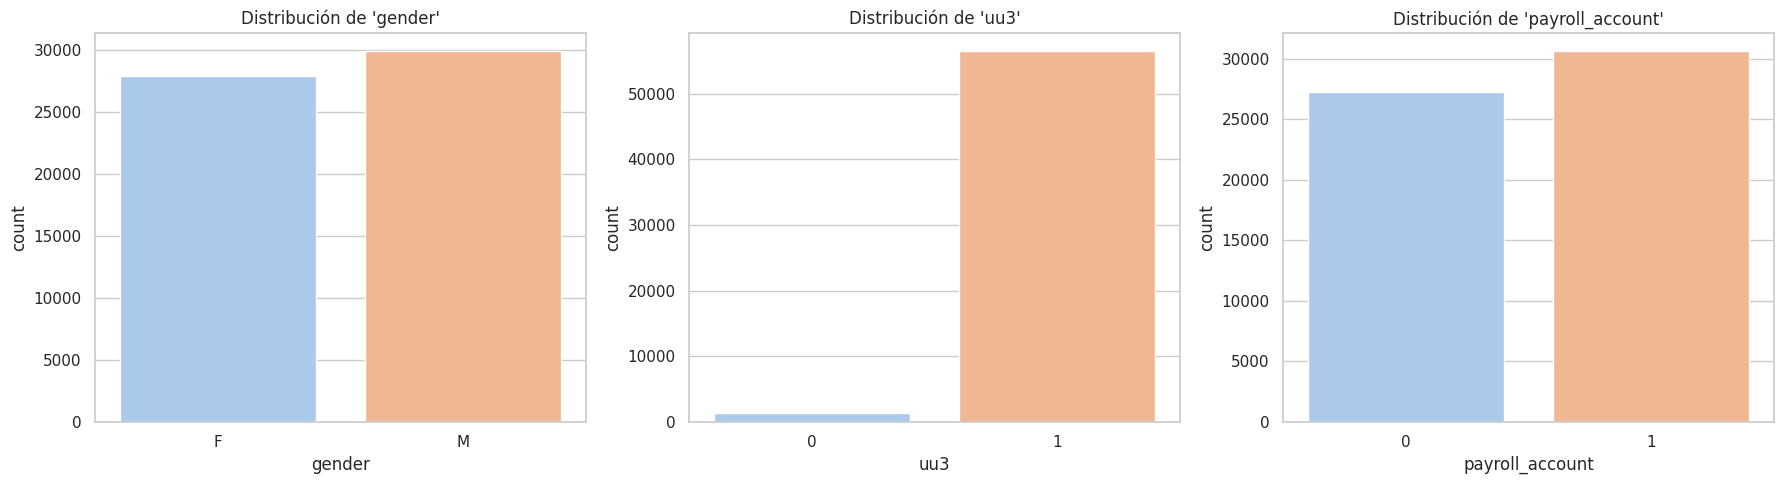

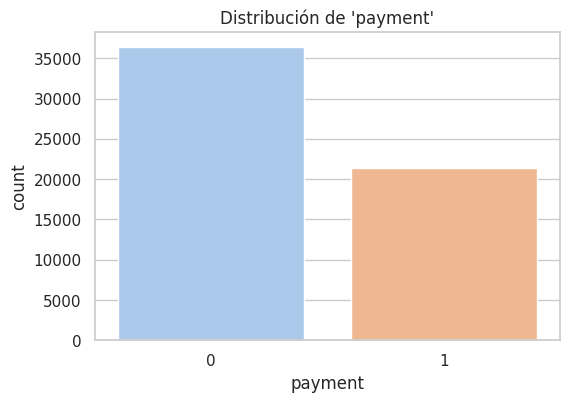

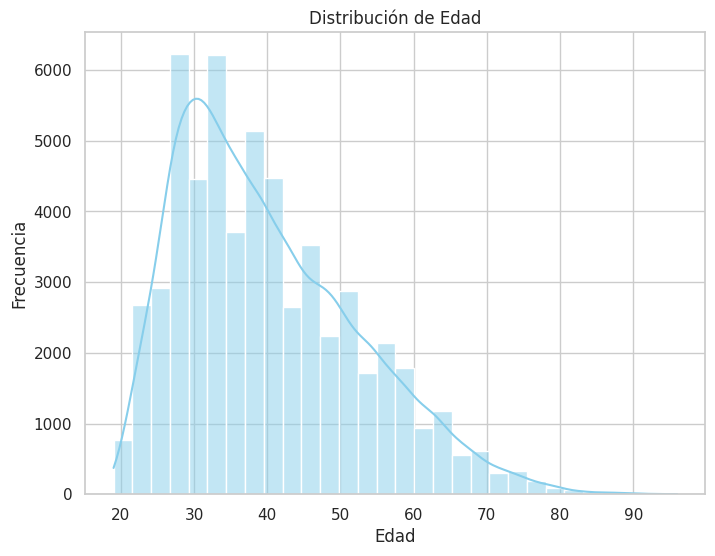

In [7]:
# ============================================
# Paso 3: Descripción de datos y transformaciones
# ============================================

# Seleccionar las variables de interés
df_subset = df[['gender', 'age', 'state', 'uu3', 'payroll_account', 'payment']]

# Verificar las primeras filas del DataFrame seleccionado
print("\nPrimeras 5 filas del DataFrame seleccionado:")
print(df_subset.head())

# Manejar valores nulos
df_subset = df_subset.dropna()

# Convertir 'gender' y 'state' a numéricas usando Label Encoding
le_gender = LabelEncoder()
df_subset['gender_num'] = le_gender.fit_transform(df_subset['gender'])

le_state = LabelEncoder()
df_subset['state_num'] = le_state.fit_transform(df_subset['state'])

# Estadísticas descriptivas de 'age'
print("\nEstadísticas descriptivas de 'age':")
print(df_subset['age'].describe())

# Distribución de variables categóricas
print("\nDistribución de 'gender':")
print(df_subset['gender'].value_counts())

print("\nDistribución de 'uu3':")
print(df_subset['uu3'].value_counts())

print("\nDistribución de 'payroll_account':")
print(df_subset['payroll_account'].value_counts())

print("\nDistribución de 'payment':")
print(df_subset['payment'].value_counts())

# Gráficas de distribución de variables categóricas
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(data=df_subset, x='gender', palette='pastel')
plt.title("Distribución de 'gender'")

plt.subplot(1,3,2)
sns.countplot(data=df_subset, x='uu3', palette='pastel')
plt.title("Distribución de 'uu3'")

plt.subplot(1,3,3)
sns.countplot(data=df_subset, x='payroll_account', palette='pastel')
plt.title("Distribución de 'payroll_account'")

plt.tight_layout()
plt.show()

# Gráfica de distribución de 'payment'
plt.figure(figsize=(6,4))
sns.countplot(data=df_subset, x='payment', palette='pastel')
plt.title("Distribución de 'payment'")
plt.show()

# Histograma de 'age'
plt.figure(figsize=(8,6))
sns.histplot(df_subset['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Comentarios

*   **Género:** Hay una distribución relativamente equilibrada entre hombres (M) y mujeres (F), con una leve mayor proporción de hombres en la muestra.
*   **Edad:** La edad tiene una distribución sesgada hacia la izquierda, con un pico en torno a los 30 años y una disminución gradual en edades superiores.
*   **UU3:** Por la estrategia de BBVA, se ha decidido comenzar el piloto de las notificaciones push con los clientes que utilizan la aplicación, no solo que la tienen.
*   **Nómina:** La variable presenta una distribución balanceada, donde una parte significativa de los clientes tiene una cuenta de nómina (payroll_account = 1), mientras que otra porción considerable no la tiene (payroll_account = 0).
*   **Pagos:** Hay una mayor proporción de personas que no han realizado pagos (payment = 0) comparado con aquellas que sí lo han hecho (payment = 1). Esto puede sugerir que existen barreras o comportamientos diferenciados en la realización de pagos, lo que podría ser un tema de interés para análisis de comportamiento financiero.

# Paso 4: Análisis de correlaciones y Pruebas Estadísticas

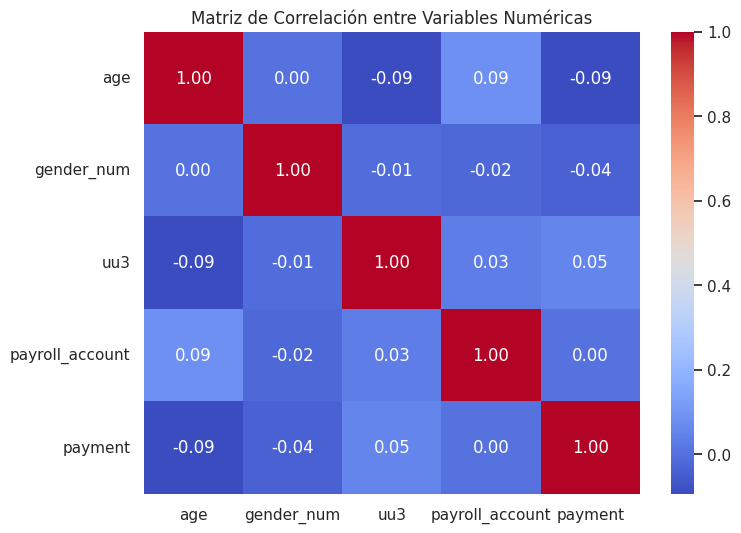


Prueba Chi-cuadrado entre 'uu3' y 'payment':
Chi2 = 174.0418, p-valor = 0.0000
Existe una asociación significativa entre 'uu3' y 'payment'.


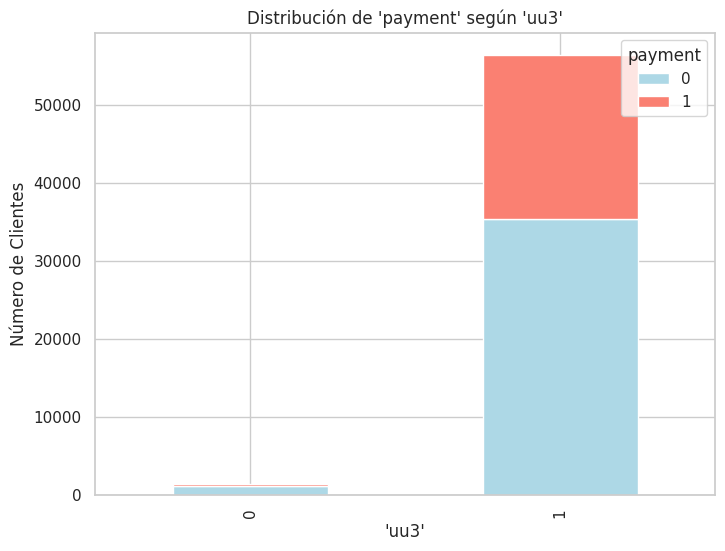


Prueba Chi-cuadrado entre 'payroll_account' y 'payment':
Chi2 = 1.3179, p-valor = 0.2510
No existe una asociación significativa entre 'payroll_account' y 'payment'.


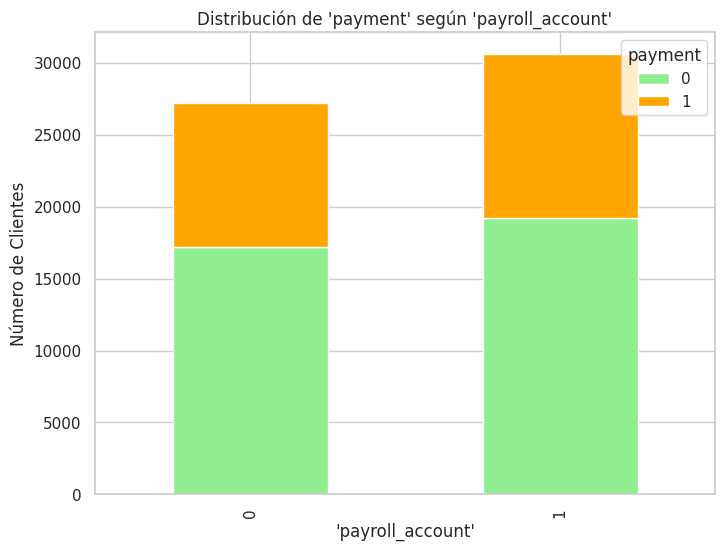


Prueba Chi-cuadrado entre 'gender' y 'payment':
Chi2 = 96.4133, p-valor = 0.0000
Existe una asociación significativa entre 'gender' y 'payment'.


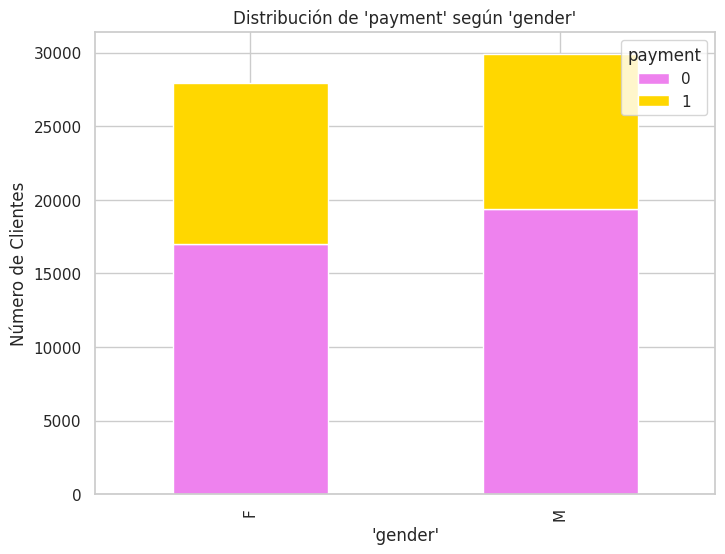


Prueba t de Student para 'age' entre Pagaron y No Pagaron:
t-statistic = 23.0658, p-valor = 0.0000
Existe una diferencia significativa en la edad entre los grupos.


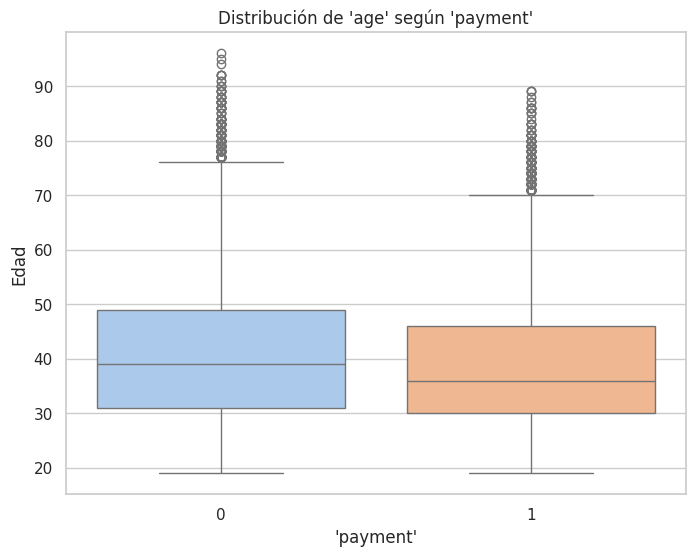


Prueba Chi-cuadrado entre 'state' y 'payment':
Chi2 = 143.7769, p-valor = 0.0000
Existe una asociación significativa entre 'state' y 'payment'.


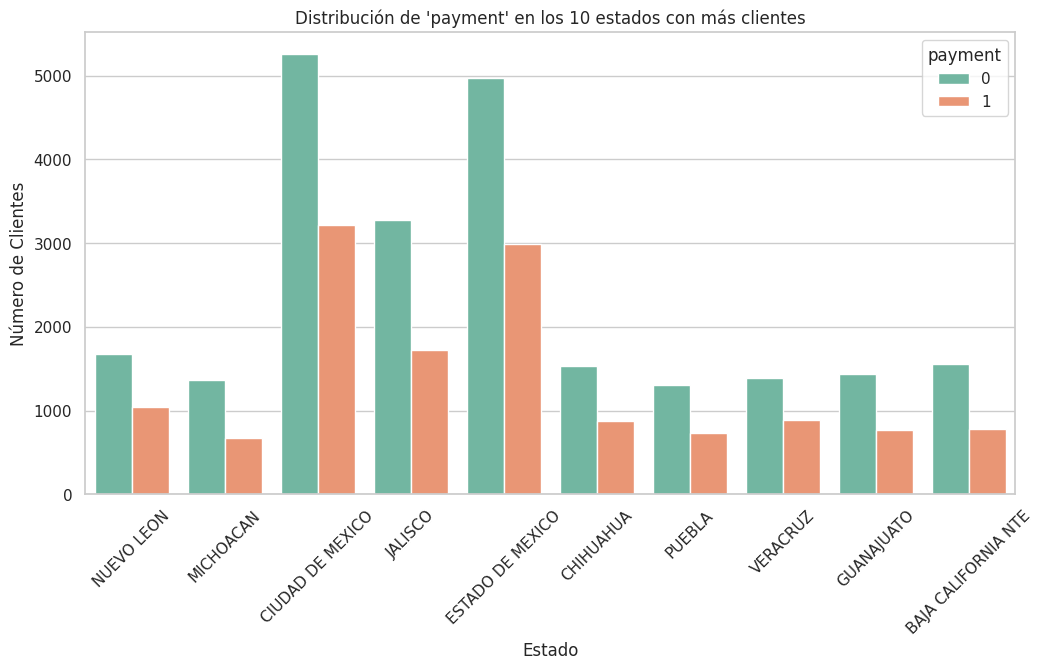

In [8]:
# ============================================
# Paso 4: Análisis de correlaciones y pruebas estadísticas
# ============================================

# a. Matriz de correlación
# Crear matriz de correlación
corr_matrix = df_subset[['age', 'gender_num', 'uu3', 'payroll_account', 'payment']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# b. Pruebas chi-cuadrado para variables categóricas

# i. 'uu3' y 'payment'
contingency_table_uu3 = pd.crosstab(df_subset['uu3'], df_subset['payment'])
chi2_uu3, p_uu3, dof_uu3, expected_uu3 = stats.chi2_contingency(contingency_table_uu3)
print("\nPrueba Chi-cuadrado entre 'uu3' y 'payment':")
print(f"Chi2 = {chi2_uu3:.4f}, p-valor = {p_uu3:.4f}")
if p_uu3 < 0.05:
    print("Existe una asociación significativa entre 'uu3' y 'payment'.")
else:
    print("No existe una asociación significativa entre 'uu3' y 'payment'.")

# Gráfica de barras apiladas para 'uu3' y 'payment'
contingency_table_uu3.plot(kind='bar', stacked=True, figsize=(8,6), color=['lightblue', 'salmon'])
plt.title("Distribución de 'payment' según 'uu3'")
plt.xlabel("'uu3'")
plt.ylabel('Número de Clientes')
plt.legend(title='payment', loc='upper right')
plt.show()

# ii. 'payroll_account' y 'payment'
contingency_table_payroll = pd.crosstab(df_subset['payroll_account'], df_subset['payment'])
chi2_payroll, p_payroll, dof_payroll, expected_payroll = stats.chi2_contingency(contingency_table_payroll)
print("\nPrueba Chi-cuadrado entre 'payroll_account' y 'payment':")
print(f"Chi2 = {chi2_payroll:.4f}, p-valor = {p_payroll:.4f}")
if p_payroll < 0.05:
    print("Existe una asociación significativa entre 'payroll_account' y 'payment'.")
else:
    print("No existe una asociación significativa entre 'payroll_account' y 'payment'.")

# Gráfica de barras apiladas para 'payroll_account' y 'payment'
contingency_table_payroll.plot(kind='bar', stacked=True, figsize=(8,6), color=['lightgreen', 'orange'])
plt.title("Distribución de 'payment' según 'payroll_account'")
plt.xlabel("'payroll_account'")
plt.ylabel('Número de Clientes')
plt.legend(title='payment', loc='upper right')
plt.show()

# iii. 'gender' y 'payment'
contingency_table_gender = pd.crosstab(df_subset['gender'], df_subset['payment'])
chi2_gender, p_gender, dof_gender, expected_gender = stats.chi2_contingency(contingency_table_gender)
print("\nPrueba Chi-cuadrado entre 'gender' y 'payment':")
print(f"Chi2 = {chi2_gender:.4f}, p-valor = {p_gender:.4f}")
if p_gender < 0.05:
    print("Existe una asociación significativa entre 'gender' y 'payment'.")
else:
    print("No existe una asociación significativa entre 'gender' y 'payment'.")

# Gráfica de barras apiladas para 'gender' y 'payment'
contingency_table_gender.plot(kind='bar', stacked=True, figsize=(8,6), color=['violet', 'gold'])
plt.title("Distribución de 'payment' según 'gender'")
plt.xlabel("'gender'")
plt.ylabel('Número de Clientes')
plt.legend(title='payment', loc='upper right')
plt.show()

# c. Prueba t de Student para 'age' entre pagaron y no pagaron
group0_age = df_subset[df_subset['payment'] == 0]['age']
group1_age = df_subset[df_subset['payment'] == 1]['age']
t_stat_age, p_val_age = stats.ttest_ind(group0_age, group1_age, equal_var=False)
print(f"\nPrueba t de Student para 'age' entre Pagaron y No Pagaron:")
print(f"t-statistic = {t_stat_age:.4f}, p-valor = {p_val_age:.4f}")
if p_val_age < 0.05:
    print("Existe una diferencia significativa en la edad entre los grupos.")
else:
    print("No existe una diferencia significativa en la edad entre los grupos.")

# Gráfica de cajas (boxplot) de 'age' por 'payment'
plt.figure(figsize=(8,6))
sns.boxplot(data=df_subset, x='payment', y='age', palette='pastel')
plt.title("Distribución de 'age' según 'payment'")
plt.xlabel("'payment'")
plt.ylabel('Edad')
plt.show()

# d. Análisis de 'state' y 'payment'
# Debido a la cantidad de estados, podemos hacer una prueba chi-cuadrado
contingency_table_state = pd.crosstab(df_subset['state'], df_subset['payment'])
chi2_state, p_state, dof_state, expected_state = stats.chi2_contingency(contingency_table_state)
print("\nPrueba Chi-cuadrado entre 'state' y 'payment':")
print(f"Chi2 = {chi2_state:.4f}, p-valor = {p_state:.4f}")
if p_state < 0.05:
    print("Existe una asociación significativa entre 'state' y 'payment'.")
else:
    print("No existe una asociación significativa entre 'state' y 'payment'.")

# Gráfica de barras para los 10 estados con más clientes y su proporción de 'payment'
top_states = df_subset['state'].value_counts().nlargest(10).index
df_top_states = df_subset[df_subset['state'].isin(top_states)]
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_states, x='state', hue='payment', palette='Set2')
plt.title("Distribución de 'payment' en los 10 estados con más clientes")
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.legend(title='payment', loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Comentarios

*   **Matriz de correlación:** Las variables tienen relaciones débiles entre sí. Esto sugiere que el comportamiento de pago (payment) y otras variables como la cuenta de nómina (payroll_account) y la edad (age) no están fuertemente correlacionadas.
*   **Relación entre 'uu3' y 'payment':** Existe una asociación entre las variables 'uu3' y 'payment'. Esto confirma que fueron seleccionados clientes que utilizan la aplicación.
*   **Relación entre 'payroll_account' y 'payment':** No se encuentra una asociación significativa entre tener una cuenta de nómina y realizar pagos. Esto significa que tener acceso a una cuenta de nómina no necesariamente predice el comportamiento de pago.
*   **Relación entre 'gender' y 'payment':** Hay una ligera diferencia en la cantidad de hombres que realizan pagos comparado con mujeres, aunque ambos géneros muestran un patrón bastante similar en términos generales.
*    **Diferencias de edad entre pagos:** La prueba t muestra una diferencia en la edad promedio entre las personas que han realizado pagos y las que no. Los que han pagado tienden a ser ligeramente más jóvenes.
*    **Relación entre 'state' y 'payment':** Distribución de clientes que han realizado pagos (payment = 1) y los que no han realizado pagos (payment = 0) en los 10 estados con más clientes.d)

# Paso 5: Análisis de distribuciones y normalidad


Prueba de Shapiro-Wilk para 'age': Estadístico=0.9502, p-valor=0.0000
La variable 'age' no sigue una distribución normal.


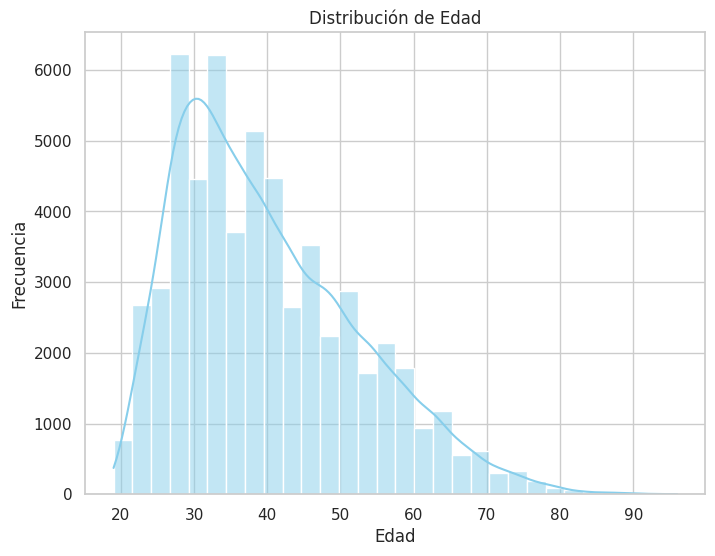


Lambda óptimo para Box-Cox: -0.2508

Prueba Shapiro-Wilk para 'age' transformada: Estadístico=0.9895, p-valor=0.0000
La variable 'age' transformada no sigue una distribución normal.


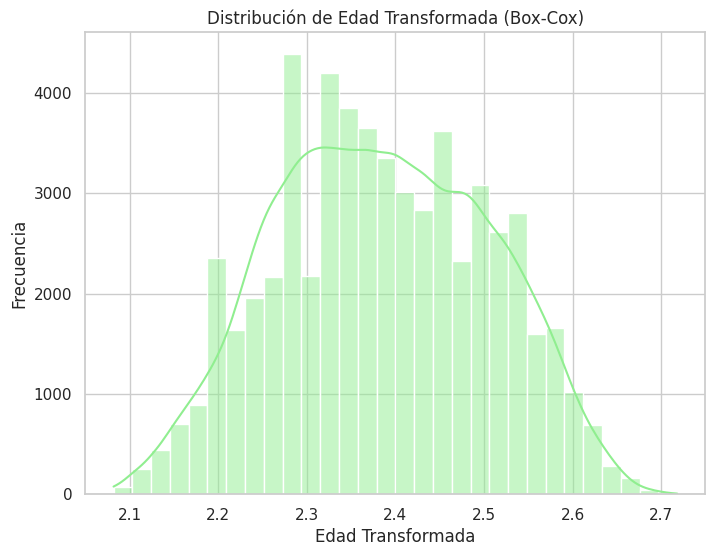


Conclusión sobre Transformaciones:
A pesar de las transformaciones, 'age' no sigue una distribución normal. Procederemos sin transformar 'age'.


In [9]:
# ============================================
# Paso 5: Análisis de distribuciones y normalidad
# ============================================

# a. Prueba de normalidad para 'age'
stat, p = shapiro(df_subset['age'])
print(f"\nPrueba de Shapiro-Wilk para 'age': Estadístico={stat:.4f}, p-valor={p:.4f}")
if p > 0.05:
    print("La variable 'age' sigue una distribución normal.")
else:
    print("La variable 'age' no sigue una distribución normal.")

# Histograma de 'age'
plt.figure(figsize=(8,6))
sns.histplot(df_subset['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# b. Aplicar transformación Box-Cox a 'age'
age_transformed, lambda_age = stats.boxcox(df_subset['age'] + 1e-6)
df_subset['age_boxcox'] = age_transformed
print(f"\nLambda óptimo para Box-Cox: {lambda_age:.4f}")

# Prueba de normalidad Shapiro-Wilk para 'age' transformada
stat, p = stats.shapiro(df_subset['age_boxcox'])
print(f"\nPrueba Shapiro-Wilk para 'age' transformada: Estadístico={stat:.4f}, p-valor={p:.4f}")
if p > 0.05:
    print("La variable 'age' transformada sigue una distribución normal.")
else:
    print("La variable 'age' transformada no sigue una distribución normal.")

# Histograma de 'age' transformada
plt.figure(figsize=(8,6))
sns.histplot(df_subset['age_boxcox'], bins=30, kde=True, color='lightgreen')
plt.title('Distribución de Edad Transformada (Box-Cox)')
plt.xlabel('Edad Transformada')
plt.ylabel('Frecuencia')
plt.show()

# Conclusión sobre transformaciones
print("\nConclusión sobre Transformaciones:")
print("A pesar de las transformaciones, 'age' no sigue una distribución normal. Procederemos sin transformar 'age'.")

### Comentarios

*   La distribución de la edad está sesgada hacia la derecha, con un mayor número de personas en el rango de 25 a 40 años y una cola larga hacia edades mayores. Según la prueba de Shapiro-Wilkno no sigue una distribución normal.
*   Se intentó mejorar la distribución de 'age' aplicando la transformación Box-Cox. Tras la aplicación de la transformación, se observó una distribución más simétrica, pero la edad aún no sigue una distribución normal.

# Paso 6: Análisis de varianza (ANOVA)

In [10]:
# ============================================
# Paso 6: Análisis de Varianza (ANOVA)
# ============================================

# a. ANOVA para 'age' y 'payment'
anova_age = stats.f_oneway(
    df_subset[df_subset['payment'] == 0]['age'],
    df_subset[df_subset['payment'] == 1]['age']
)
print(f"\nANOVA para 'age' y 'payment': Estadístico F={anova_age.statistic:.4f}, p-valor={anova_age.pvalue:.4f}")
if anova_age.pvalue < 0.05:
    print("Existe una diferencia significativa en 'age' entre los grupos de 'payment'.")
else:
    print("No existe una diferencia significativa en 'age' entre los grupos de 'payment'.")

# b. ANOVA para 'state' y 'payment'
# Debido al gran número de estados, seleccionaremos los 5 más representativos
top_states = df_subset['state'].value_counts().nlargest(5).index
df_top_states = df_subset[df_subset['state'].isin(top_states)]

anova_state = stats.f_oneway(
    df_top_states[df_top_states['state'] == top_states[0]]['payment'],
    df_top_states[df_top_states['state'] == top_states[1]]['payment'],
    df_top_states[df_top_states['state'] == top_states[2]]['payment'],
    df_top_states[df_top_states['state'] == top_states[3]]['payment'],
    df_top_states[df_top_states['state'] == top_states[4]]['payment']
)
print(f"\nANOVA para 'state' y 'payment' en los 5 estados más representativos:")
print(f"Estadístico F={anova_state.statistic:.4f}, p-valor={anova_state.pvalue:.4f}")
if anova_state.pvalue < 0.05:
    print("Existe una diferencia significativa en 'payment' entre los estados analizados.")
else:
    print("No existe una diferencia significativa en 'payment' entre los estados analizados.")


ANOVA para 'age' y 'payment': Estadístico F=507.0001, p-valor=0.0000
Existe una diferencia significativa en 'age' entre los grupos de 'payment'.

ANOVA para 'state' y 'payment' en los 5 estados más representativos:
Estadístico F=5.3610, p-valor=0.0003
Existe una diferencia significativa en 'payment' entre los estados analizados.


### Comentarios

*   De las variables independientes que tienen mayor relación (edad y estado) con el pago, se evalúa si hay una asociación estadísticamente significativa.
*   Las hipótesis alternativas (H₁) se cumplen.
*   Ambos resultados indican que tanto la edad como el estado influyen de manera significativa en el comportamiento de pago.

# Paso 7: Preparación de datos para modelado

In [12]:
# ============================================
# Paso 7: Preparación de datos para modelado
# ============================================

# a. Codificación de variables categóricas
# Aplicar Target Encoding a 'state'
target_encoder = ce.TargetEncoder(cols=['state'], smoothing=10)

# Definir variables independientes y dependiente
X = df_subset[['age', 'gender_num', 'uu3', 'payroll_account', 'state']]
y = df_subset['payment']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar target encoding
X_train_encoded = target_encoder.fit_transform(X_train[['state']], y_train)
X_test_encoded = target_encoder.transform(X_test[['state']])

# Combinar variables
X_train_final = pd.concat([
    X_train[['age', 'gender_num', 'uu3', 'payroll_account']].reset_index(drop=True),
    X_train_encoded.reset_index(drop=True)
], axis=1)

X_test_final = pd.concat([
    X_test[['age', 'gender_num', 'uu3', 'payroll_account']].reset_index(drop=True),
    X_test_encoded.reset_index(drop=True)
], axis=1)

# b. Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# Paso 8: Manejo del desequilibrio de clases

In [13]:
# ============================================
# Paso 8: Manejo del desequilibrio de clases
# ============================================

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nDistribución de clases después de aplicar SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Distribución de clases después de aplicar SMOTE:
payment
0    29125
1    29125
Name: count, dtype: int64


# Paso 9: Entrenamiento y evaluación del modelo de regresión logística


Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.68      0.50      0.58      7282
           1       0.42      0.60      0.49      4282

    accuracy                           0.54     11564
   macro avg       0.55      0.55      0.54     11564
weighted avg       0.58      0.54      0.55     11564



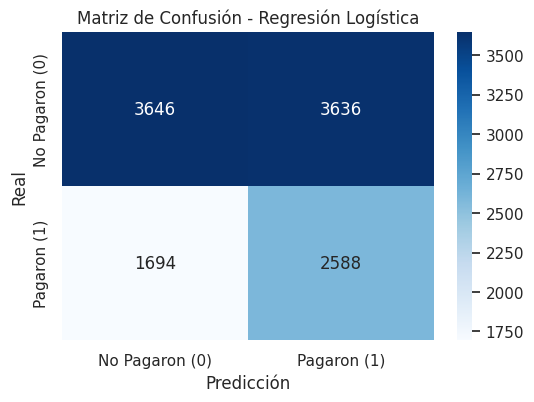

Área bajo la curva ROC (AUC): 0.5787


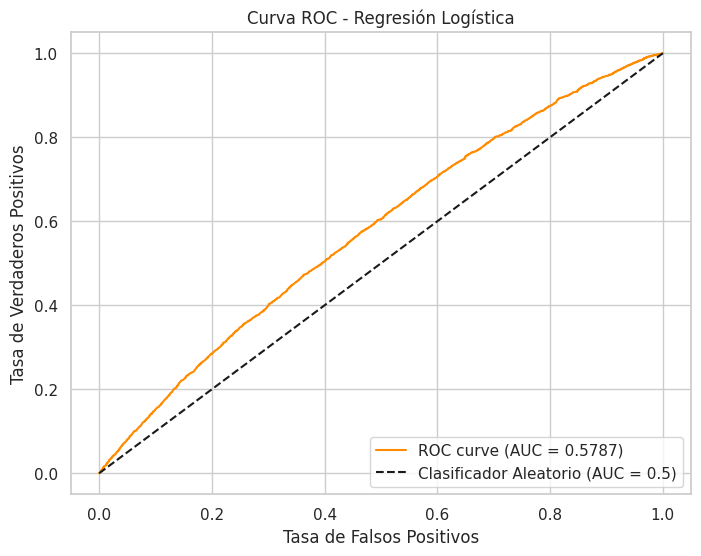

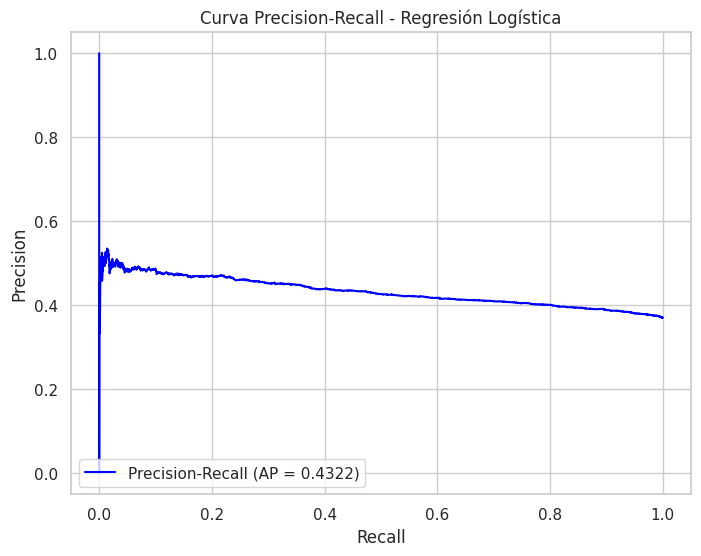

Exactitud del modelo: 0.5391
Precisión (Precision): 0.4158
Sensibilidad (Recall): 0.6044
Puntuación F1 (F1 Score): 0.4927


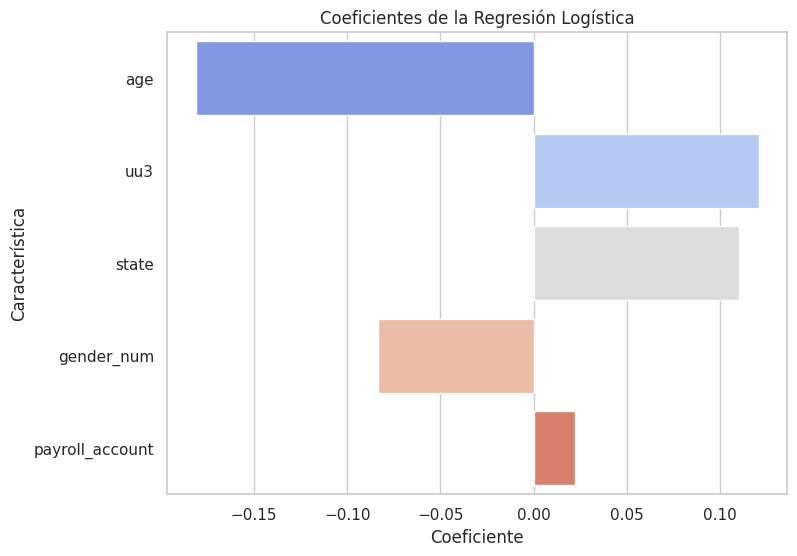

In [14]:
# ============================================
# Paso 9: Entrenamiento y evaluación del modelo de regresión logística
# ============================================

# Definir el modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
model.fit(X_train_smote, y_train_smote)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

# Reporte de clasificación
print("\nReporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Pagaron (0)', 'Pagaron (1)'],
            yticklabels=['No Pagaron (0)', 'Pagaron (1)'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Cálculo del AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"Área bajo la curva ROC (AUC): {auc_score:.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Clasificador Aleatorio (AUC = 0.5)')
plt.title('Curva ROC - Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

# Curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision:.4f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Regresión Logística')
plt.legend(loc='lower left')
plt.show()

# Calcular la exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Calcular otras métricas
precision_score_value = precision_score(y_test, y_pred)
recall_score_value = recall_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)

print(f"Precisión (Precision): {precision_score_value:.4f}")
print(f"Sensibilidad (Recall): {recall_score_value:.4f}")
print(f"Puntuación F1 (F1 Score): {f1_score_value:.4f}")

# Obtener coeficientes del modelo
coef = model.coef_[0]
features = X_train_final.columns
coef_df = pd.DataFrame({'Feature': features, 'Coeficiente': coef})
coef_df['Valor Absoluto'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Valor Absoluto', ascending=False)

# Visualizar los coeficientes de la regresión logística
plt.figure(figsize=(8,6))
sns.barplot(x='Coeficiente', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Coeficientes de la Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()

# Paso 10: Regresión lineal múltiple


Resultados de la Regresión Lineal Múltiple:
Error Cuadrático Medio (MSE): 0.2301
Coeficiente de Determinación (R^2): 0.0127


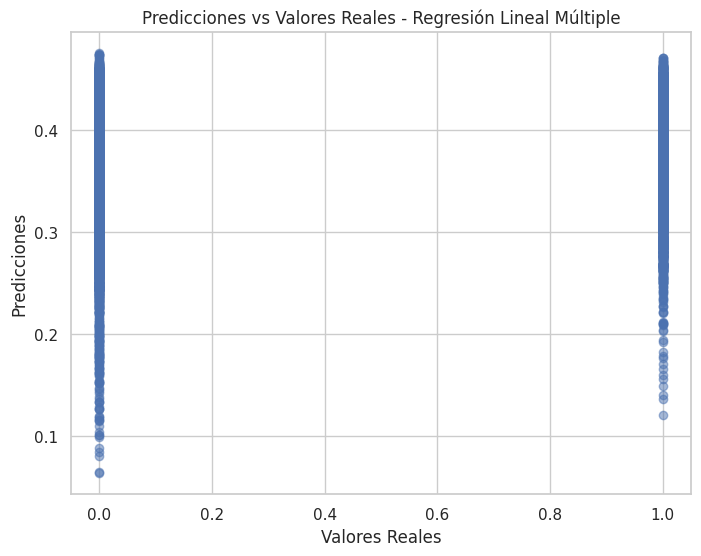

In [15]:
# ============================================
# Paso 10: Regresión lineal múltiple
# ============================================

# Definir variables independientes y dependiente para regresión lineal
X_linear = df_subset[['age', 'gender_num', 'uu3', 'payroll_account', 'state_num']]
y_linear = df_subset['payment']

# Dividir en conjuntos de entrenamiento y prueba
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

# Ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train_lin, y_train_lin)

# Evaluar el modelo
y_pred_lin = linear_model.predict(X_test_lin)
mse = mean_squared_error(y_test_lin, y_pred_lin)
r2 = r2_score(y_test_lin, y_pred_lin)
print(f"\nResultados de la Regresión Lineal Múltiple:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

# Gráfica de predicciones vs valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test_lin, y_pred_lin, alpha=0.5)
plt.title('Predicciones vs Valores Reales - Regresión Lineal Múltiple')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# Paso 11: Análisis factorial

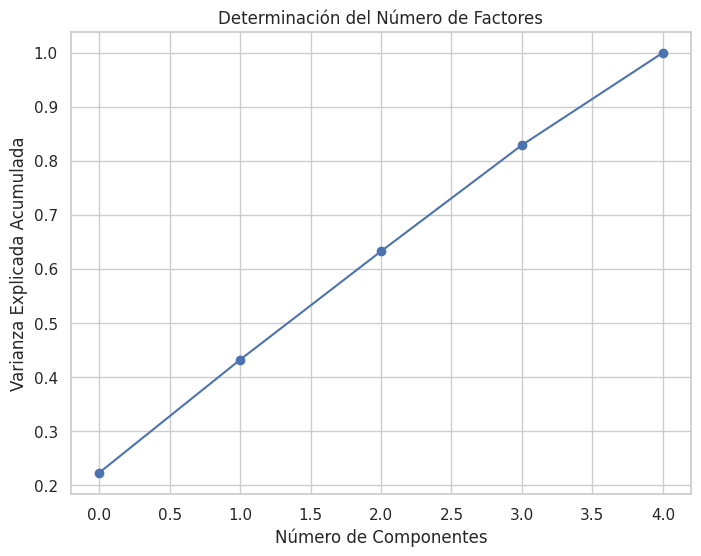

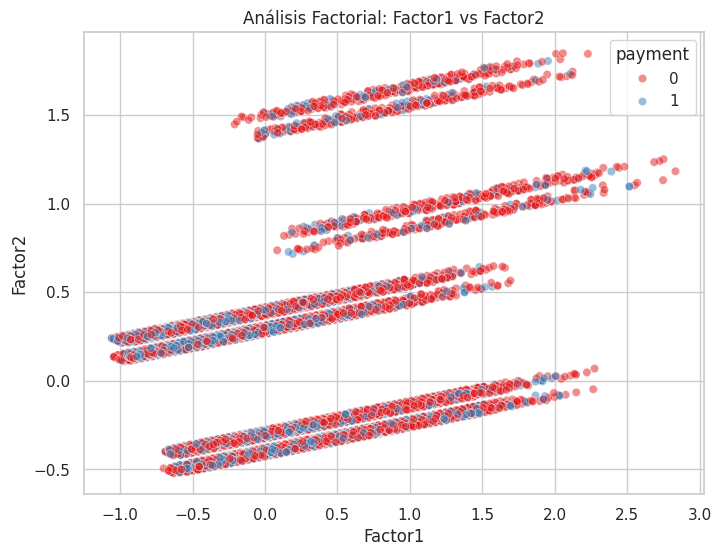

In [18]:
# ============================================
# Paso 11: Análisis factorial
# ============================================

# Preparar datos para análisis factorial
X_fa = df_subset[['age', 'gender_num', 'uu3', 'payroll_account', 'state_num']]

# Escalar los datos
scaler_fa = StandardScaler()
X_fa_scaled = scaler_fa.fit_transform(X_fa)

# Determinar el número óptimo de factores
pca = PCA().fit(X_fa_scaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Determinación del Número de Factores')
plt.show()

# Según la gráfica, podemos elegir 2 factores
fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(X_fa_scaled)
X_fa_transformed = fa.transform(X_fa_scaled)

# Crear un DataFrame con los factores
df_factors = pd.DataFrame(X_fa_transformed, columns=['Factor1', 'Factor2'])
df_factors['payment'] = df_subset['payment'].reset_index(drop=True)

# Gráfica de factores
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_factors, x='Factor1', y='Factor2', hue='payment', palette='Set1', alpha=0.5)
plt.title('Análisis Factorial: Factor1 vs Factor2')
plt.show()


Reporte de Clasificación (Análisis Discriminante):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      7282
           1       0.00      0.00      0.00      4282

    accuracy                           0.63     11564
   macro avg       0.31      0.50      0.39     11564
weighted avg       0.40      0.63      0.49     11564



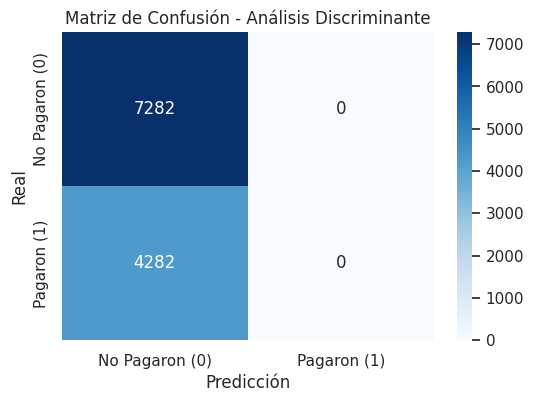

Exactitud del modelo (Análisis Discriminante): 0.6297


In [20]:
# ============================================
# Paso 12: Análisis discriminante para clasificación
# ============================================

# Definir variables independientes y dependiente
X_lda = X_fa_scaled  # Usamos los mismos datos escalados
y_lda = df_subset['payment']

# Dividir en conjuntos de entrenamiento y prueba
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(
    X_lda, y_lda, test_size=0.2, random_state=42, stratify=y_lda
)

# Ajustar el modelo de análisis discriminante
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train_lda)

# Realizar predicciones
y_pred_lda = lda.predict(X_test_lda)

# Evaluar el modelo
print("\nReporte de Clasificación (Análisis Discriminante):")
print(classification_report(y_test_lda, y_pred_lda))

# Matriz de confusión
cm_lda = confusion_matrix(y_test_lda, y_pred_lda)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Pagaron (0)', 'Pagaron (1)'],
            yticklabels=['No Pagaron (0)', 'Pagaron (1)'])
plt.title('Matriz de Confusión - Análisis Discriminante')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Exactitud del modelo
accuracy_lda = accuracy_score(y_test_lda, y_pred_lda)
print(f"Exactitud del modelo (Análisis Discriminante): {accuracy_lda:.4f}")

# Paso 13: Conclusiones finales

*   Realizar un piloto enfocado en clientes que tienen la aplicación para evaluar cómo influye su uso en la probabilidad de pago.
*   La tenencia de una cuenta de nómina en el banco no afecta significativamente la probabilidad de que un cliente realice un pago.
*   Los clientes más jóvenes muestran mayor propensión al pago, lo que sugiere la posibilidad de estrategias de comunicación segmentadas por edad.
*   Las diferencias en el comportamiento de pago entre géneros indican que se pueden personalizar estrategias de comunicación para hombres y mujeres y medir su impacto.
*   Existe una asociación significativa entre el estado de residencia y el comportamiento de pago.
*   Es necesario incluir variables adicionales para mejorar la precisión de los modelos predictivos.

# Referencias

1.   Rodríguez, D., Rodríguez, D., & Rodríguez, D. (2024, September 21). Comprar el ‘súper’ y otros gastos diarios: así vive México el bum de las tarjetas de crédito. El País México. https://elpais.com/mexico/2024-09-21/comprar-el-super-y-otros-gastos-diarios-asi-vive-mexico-el-bum-de-las-tarjetas-de-credito.html
2.   Bienvenidos | Asociación de Bancos de México. (n.d.). https://www.abm.org.mx/
3.   SPSS Modeler Subscription. (n.d.). https://www.ibm.com/docs/es/spss-modeler/saas?topic=dm-crisp-help-overview